In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

Training data before Lasso feature selection

In [41]:
# Load data
cop_data = pd.read_csv('cop_training_dataset.csv')

In [42]:
# Extracting the features and target variable
X = cop_data.drop(columns=['COP', 'subject'])  # Dropping the target and identifier columns
y = cop_data['COP']

In [43]:
# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a linear regression model
linear_reg = LinearRegression()

# Evaluate the model using cross-validation and calculate metrics
cv_r2 = cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='r2').mean()
cv_rmse = np.sqrt(-cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())
cv_mae = -cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='neg_mean_absolute_error').mean()

print(f'R-squared: {cv_r2}')
print(f'Root Mean Squared Error (RMSE): {cv_rmse}')
print(f'Mean Absolute Error (MAE): {cv_mae}')


R-squared: -4.386874802024803
Root Mean Squared Error (RMSE): 0.02725135208435215
Mean Absolute Error (MAE): 0.021472298118463365


In [44]:
# Generate cross-validated predictions
y_true = cop_data['COP']
y_pred = cross_val_predict(linear_reg, X_scaled, y, cv=5)

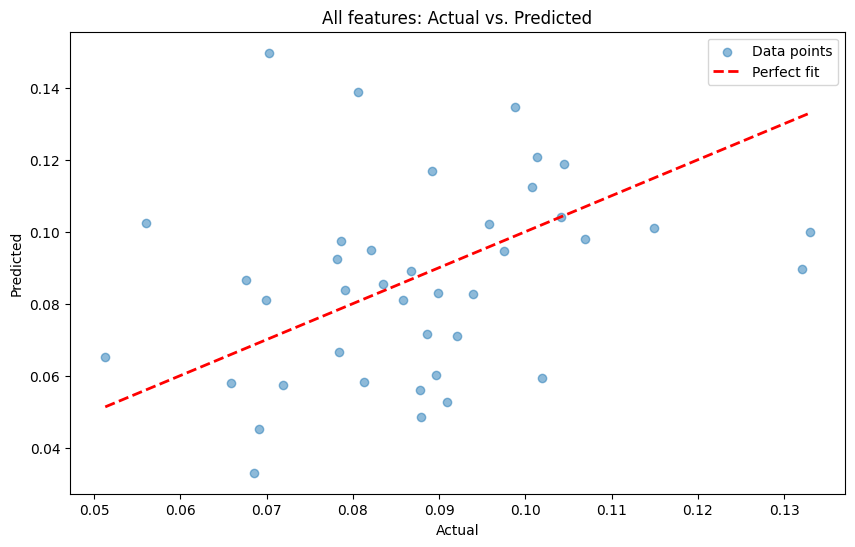

In [45]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Data points')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', lw=2, label='Perfect fit')
plt.title('All features: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.savefig('actual_vs_predicted_before_lasso.png')
plt.show()

##Lasso Feature Selection


Variable Selection: It helps to select a subset of variables (features) which are important in predicting the target variable.

Regularization: It helps to avoid overfitting of the model by adding a penalty term to the loss function.

In [46]:
# Performing Lasso with cross-validation to select the optimal alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_scaled, y)

# Displaying the optimal alpha and coefficients
optimal_alpha = lasso_cv.alpha_
coefficients = pd.Series(lasso_cv.coef_, index=X.columns)

(optimal_alpha, coefficients.sort_values(ascending=False))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e-06, tolerance: 1.075e-06
  model = cd_fast.enet_coordinate_descent(


(0.01,
 acc_x_minimum              -0.0
 acc_x_maximum               0.0
 gyr_x_mean                 -0.0
 gyr_x_std_dev               0.0
 gyr_x_skewness             -0.0
 gyr_x_kurtosis              0.0
 gyr_x_dominant_freq         0.0
 gyr_x_dominant_amplitude    0.0
 gyr_y_minimum              -0.0
 gyr_y_maximum               0.0
 gyr_y_mean                  0.0
 gyr_y_std_dev               0.0
 gyr_y_skewness              0.0
 gyr_y_kurtosis              0.0
 gyr_y_dominant_freq        -0.0
 gyr_y_dominant_amplitude    0.0
 gyr_z_minimum              -0.0
 gyr_z_maximum               0.0
 gyr_z_mean                  0.0
 gyr_z_std_dev               0.0
 gyr_z_skewness              0.0
 gyr_z_kurtosis              0.0
 gyr_z_dominant_freq        -0.0
 gyr_x_maximum               0.0
 gyr_x_minimum              -0.0
 acc_z_dominant_amplitude    0.0
 acc_y_std_dev               0.0
 acc_x_mean                 -0.0
 acc_x_std_dev               0.0
 acc_x_skewness             -0.0
 ac

80-20 split

In [47]:
# Extracting the features and target variable
X = cop_data.drop(columns=['COP', 'subject'])  # Dropping the target and identifier columns
y = cop_data['COP']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing Lasso with cross-validation to select the optimal alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Displaying the optimal alpha and coefficients
optimal_alpha = lasso_cv.alpha_
coefficients = pd.Series(lasso_cv.coef_, index=X.columns)

(optimal_alpha, coefficients.sort_values(ascending=False))


(0.001,
 gyr_y_skewness              0.007029
 gyr_z_maximum               0.002132
 gyr_x_dominant_amplitude    0.001559
 acc_x_skewness              0.001351
 gyr_x_dominant_freq         0.001276
 gyr_z_dominant_amplitude    0.000690
 gyr_z_skewness              0.000672
 gyr_x_mean                 -0.000000
 gyr_x_std_dev              -0.000000
 gyr_x_kurtosis              0.000000
 gyr_y_minimum               0.000000
 gyr_y_maximum               0.000000
 gyr_y_std_dev               0.000000
 gyr_y_dominant_freq        -0.000000
 gyr_y_kurtosis             -0.000000
 acc_z_dominant_amplitude   -0.000000
 gyr_y_dominant_amplitude   -0.000000
 gyr_z_minimum               0.000000
 gyr_z_mean                  0.000000
 gyr_z_std_dev               0.000000
 gyr_z_kurtosis              0.000000
 gyr_z_dominant_freq         0.000000
 acc_x_maximum              -0.000000
 acc_x_minimum              -0.000000
 acc_z_dominant_freq         0.000000
 acc_y_dominant_freq         0.000000
 acc

In [48]:
# Lowest coefficients
filtered_coefficients = coefficients[(coefficients < -0.002)]

filtered_coefficients.sort_values(ascending=True)

acc_y_minimum    -0.008538
gyr_x_maximum    -0.004815
gyr_x_skewness   -0.002895
dtype: float64

In [49]:
# Highest coefficients
filtered_coefficients = coefficients[(coefficients > 0.002)]

filtered_coefficients.sort_values(ascending=False)

gyr_y_skewness    0.007029
gyr_z_maximum     0.002132
dtype: float64

In [50]:
top_features = ['acc_y_minimum',
'gyr_x_maximum',
'gyr_x_skewness',
'gyr_y_skewness',
'gyr_z_maximum'
]

# Extract the top features
X_top = X[top_features]

# Fita new scaler for the top features
scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top)

# Initialise a Linear Regression model
linear_reg = LinearRegression()

# R-squared, RMSE, and MAE using cross-validation for the model with top features
cv_r2_top = cross_val_score(linear_reg, X_top_scaled, y, cv=5, scoring='r2').mean()
cv_rmse_top = np.sqrt(-cross_val_score(linear_reg, X_top_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())
cv_mae_top = -cross_val_score(linear_reg, X_top_scaled, y, cv=5, scoring='neg_mean_absolute_error').mean()

print(f'R-squared: {cv_r2_top}')
print(f'Root Mean Squared Error (RMSE): {cv_rmse_top}')
print(f'Mean Absolute Error (MAE): {cv_mae_top}')

R-squared: 0.17501688964715473
Root Mean Squared Error (RMSE): 0.014221991340873449
Mean Absolute Error (MAE): 0.00991026601733013


In [51]:
# Generate cross-validated predictions
y_true = cop_data['COP']
y_pred = cross_val_predict(linear_reg, X_top_scaled, y, cv=5)

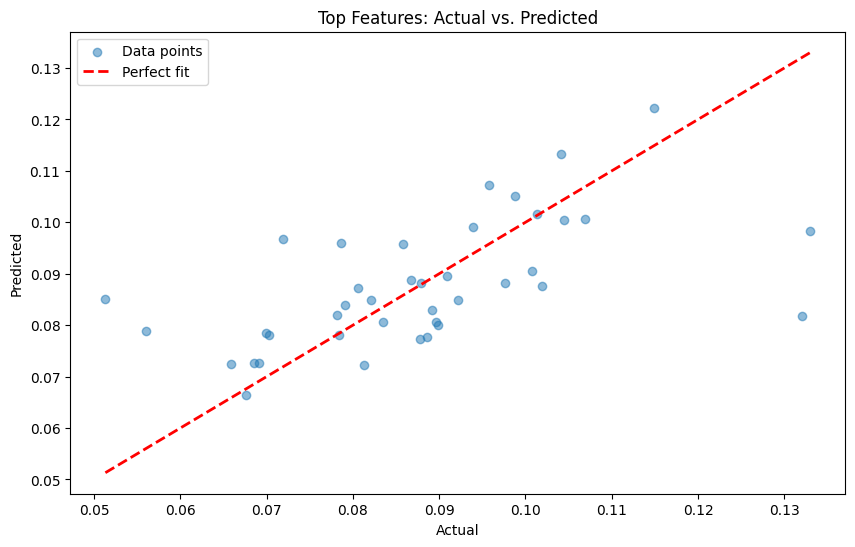

In [52]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Data points')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', lw=2, label='Perfect fit')
plt.title('Top Features: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.savefig('actual_vs_predicted_top_features.png')
plt.show()

In [53]:
# Select the top features
features_with_impact = ['acc_y_minimum',
'gyr_x_maximum',
'gyr_x_skewness',
'gyr_y_mean',
'acc_x_dominant_amplitude',
'acc_y_maximum',
'acc_y_dominant_amplitude',
'gyr_y_skewness',
'gyr_z_maximum',
'gyr_x_dominant_amplitude',
'acc_x_skewness',
'gyr_x_dominant_freq']


# Extract the top features
X_features_with_impact = X[features_with_impact]

# Fita new scaler for the top features
scaler_top = StandardScaler()
X_features_with_impact_scaled = scaler_top.fit_transform(X_features_with_impact)

# Initialise a Linear Regression model
linear_reg = LinearRegression()

# R-squared, RMSE, and MAE using cross-validation for the model with top features
cv_r2_top = cross_val_score(linear_reg, X_features_with_impact_scaled, y, cv=5, scoring='r2').mean()
cv_rmse_top = np.sqrt(-cross_val_score(linear_reg, X_features_with_impact_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())
cv_mae_top = -cross_val_score(linear_reg, X_features_with_impact_scaled, y, cv=5, scoring='neg_mean_absolute_error').mean()

print(f'R-squared: {cv_r2_top}')
print(f'Root Mean Squared Error (RMSE): {cv_rmse_top}')
print(f'Mean Absolute Error (MAE): {cv_mae_top}')

R-squared: -1.0998752349044942
Root Mean Squared Error (RMSE): 0.019598939476794273
Mean Absolute Error (MAE): 0.01423606211705103


In [54]:
# Generate cross-validated predictions
y_true = cop_data['COP']
y_pred = cross_val_predict(linear_reg, X_features_with_impact_scaled, y, cv=5)

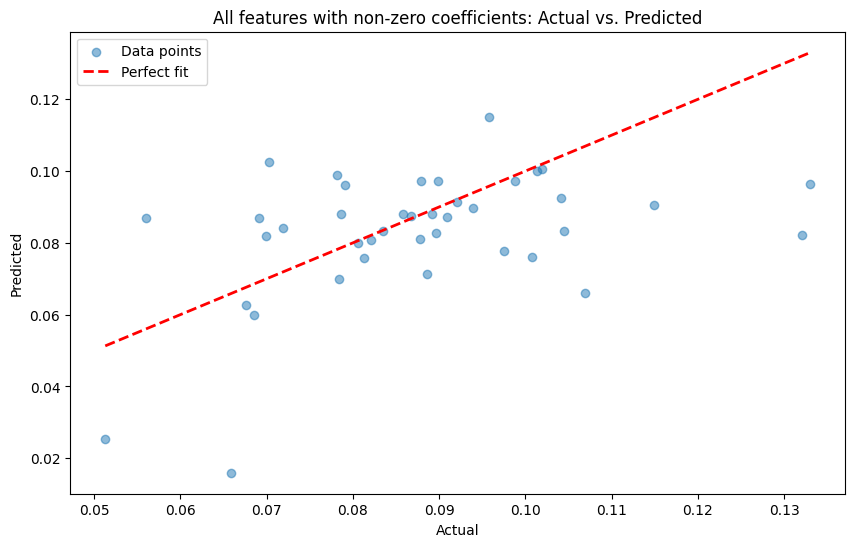

In [55]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Data points')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', lw=2, label='Perfect fit')
plt.title('All features with non-zero coefficients: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.savefig('actual_vs_predicted_features_nonzero.png')
plt.show()